In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv("E:\object det\Object_det\labels_train.csv")
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
124466,1479505515447402794.jpg,270,281,139,148,1
53058,1478898091511986354.jpg,57,66,124,131,5
39917,1478897104895202219.jpg,227,249,147,165,1
124194,1479505498448749265.jpg,203,214,142,151,1
4372,1478020436697344349.jpg,37,50,150,158,1


In [5]:
classes = df.class_id.unique()
print(classes)

[1 5 4 3 2]


In [6]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

Trying to load: E:\object det\Object_det\images\1479505515447402794.jpg
✅ Image loaded successfully!
Trying to load: E:\object det\Object_det\images\1478898091511986354.jpg
✅ Image loaded successfully!
Trying to load: E:\object det\Object_det\images\1478020277190872651.jpg
✅ Image loaded successfully!
Trying to load: E:\object det\Object_det\images\1478897783585868686.jpg
✅ Image loaded successfully!
Trying to load: E:\object det\Object_det\images\1478732149481549225.jpg
✅ Image loaded successfully!


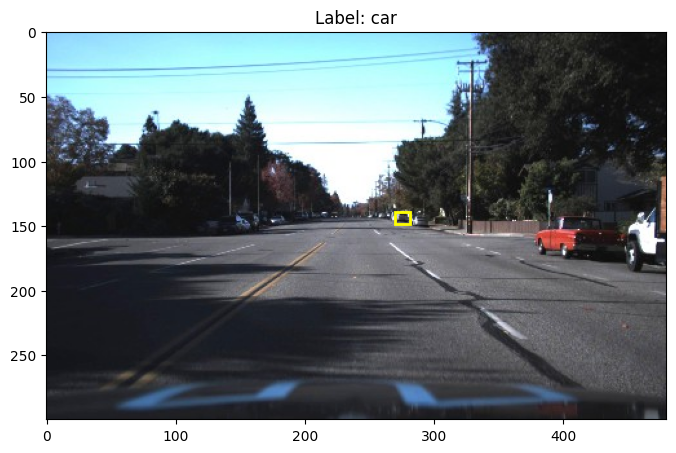

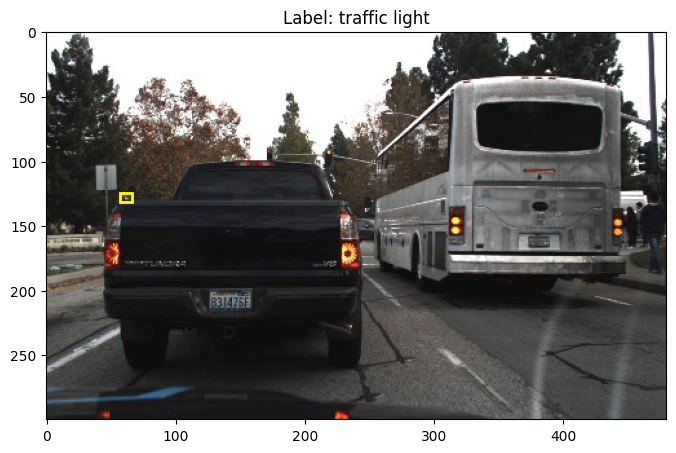

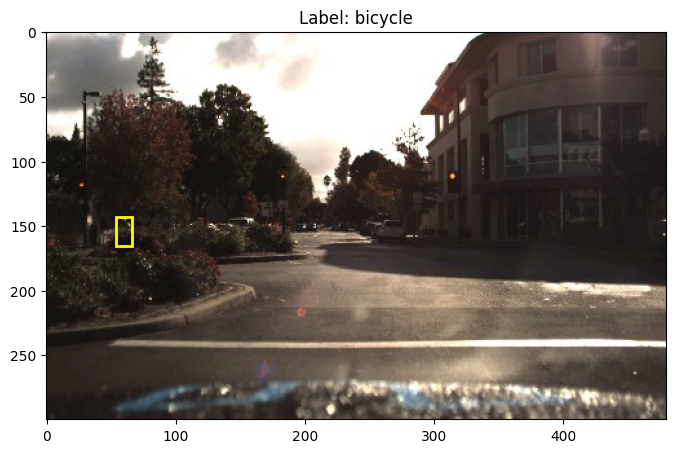

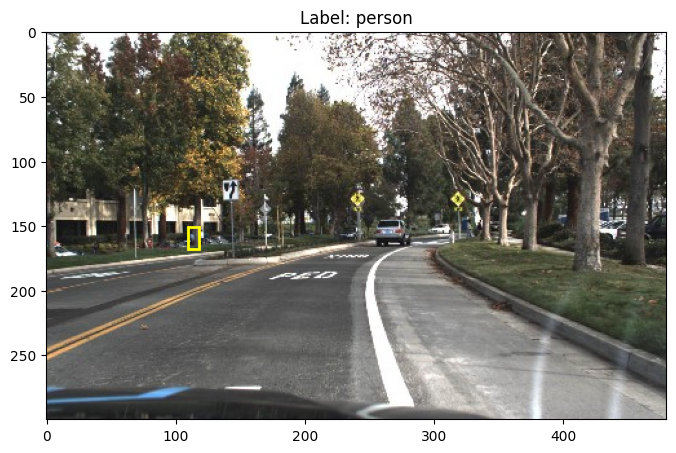

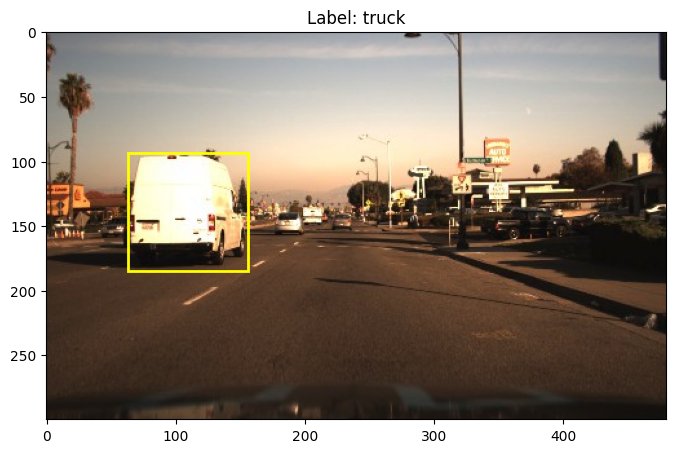

In [11]:
import os
import cv2
import matplotlib.pyplot as plt

# Update this to your actual images folder path
base_path = r"E:\object det\Object_det\images"  # Raw string to handle backslashes
boxes = {}
images = {}

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]
    
    # Construct the full image path
    img_name = first_row['frame'].strip()  # Remove extra whitespace if any
    img_path = os.path.join(base_path, img_name)
    img_path = os.path.normpath(img_path)  # Normalize path for Windows (fixes slashes)
    
    print(f"Trying to load: {img_path}")
    
    # Check if file exists before loading
    if not os.path.exists(img_path):
        print(f"❌ Error: File does not exist at {img_path}")
        continue
    
    # Load the image
    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Error: File exists but could not be loaded (corrupted or invalid format)")
        continue
    
    print("✅ Image loaded successfully!")
    
    # Store the image (converted to RGB for matplotlib) and bounding box
    images[class_id] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    boxes[class_id] = [first_row['xmin'], first_row['xmax'], first_row['ymin'], first_row['ymax']]

# Display images with bounding boxes
for i in classes:
    if i not in images:
        print(f"Skipping class {i} (image not loaded)")
        continue
    
    xmin, xmax, ymin, ymax = boxes[i]
    plt.figure(figsize=(8, 10))
    plt.title(f"Label: {labels[i]}")
    plt.imshow(images[i])
    plt.gca().add_patch(
        plt.Rectangle(
            (xmin, ymin),
            xmax - xmin,
            ymax - ymin,
            color='yellow',
            fill=False,
            linewidth=2
        )
    )
    plt.show()

In [12]:
pip install ultralytics

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached torch-2.7.0-cp313-cp313-win_amd64.whl.metadata (29 kB)
  Using cached torchvision-0.22.0-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   -------------------- ------------------- 0.5/1.0 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 1.3/212.5 MB 7.3 MB/s eta 0:00:29
    --------------------------------------- 2.9/212.5 MB 7.1 MB/s eta 0:00:30
    --------------------------------------- 3.9/212.5 MB 6.8 MB/s eta 0:00:31
   - -------------------------------------- 5.8/212.5 MB 6.9 MB/s eta 0:00:30
   - -------------------------------------- 7.6/212.5 MB 7.2 MB/s eta 0:00:29
   - -------------------------------------- 9.4/212.5 MB 7.5 MB/s eta 0:00:28
   -- ------------------------------------- 11.0/212.5 MB 7.5 MB/s eta 0:00:27
   -- -------

In [13]:
from ultralytics import YOLO
import PIL 
from PIL import Image
from IPython.display import display
import os 
import pathlib 

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Lenovo\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [14]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:08<00:00, 6.40MB/s]


In [15]:
results=model.predict(source="E:\object det\Object_det\images/1478019956680248165.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 E:\object det\Object_det\images\1478019956680248165.jpg: 416x640 1 car, 1 truck, 706.6ms
Speed: 23.5ms preprocess, 706.6ms inference, 14.9ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict


In [16]:
result = results[0]
box = result.boxes[0]

In [17]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [18]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.69143676757812, 142.68826293945312, 148.7809295654297, 162.10047912597656]
Probability: 0.7161703109741211


In [19]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [125, 143, 149, 162]
Probability: 0.72
---
Object type: truck
Coordinates: [141, 139, 157, 154]
Probability: 0.31
---


In [21]:
results1 = model.predict(source="E:\object det\Object_det\images/1478020211690815798.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 E:\object det\Object_det\images\1478020211690815798.jpg: 416x640 4 cars, 3 traffic lights, 742.6ms
Speed: 9.8ms preprocess, 742.6ms inference, 5.8ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict


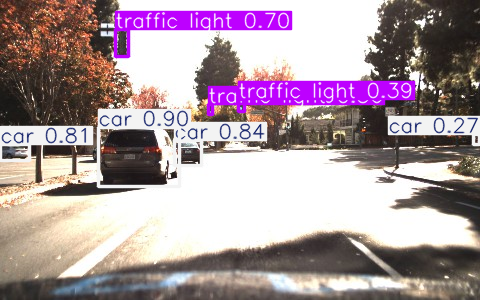

In [22]:
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [26]:
results2 = model.predict(source="E:\object det\Object_det\images/1478020268190844016.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results2[0]


image 1/1 E:\object det\Object_det\images\1478020268190844016.jpg: 416x640 2 cars, 2 traffic lights, 644.0ms
Speed: 4.3ms preprocess, 644.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict


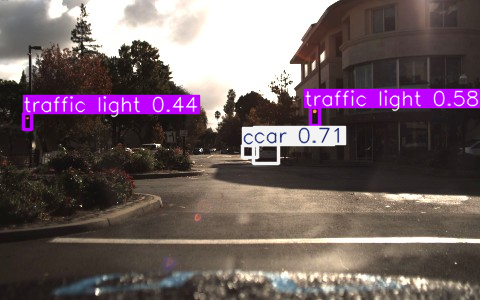

In [27]:
plot = results2[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))